<a href="https://colab.research.google.com/github/Rohan1-tech/Time-Series-Forecasting---FBI-s-Crime-Investigation/blob/main/Time_Series_Forecasting_FBI's_Crime_Investigation_BY_Rohan_pagare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Time Series Forecasting - FBI's Crime Investigation



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
**Name** - Rohan Pagare

# **Project Summary -**

The FBI Crime Investigation Project is a strategic initiative designed to harness the power of data analytics to predict crime patterns and improve public safety. In recent years, urban centers across the United States have faced challenges related to rising crime rates and the complex dynamics of crime occurrences. To address these issues effectively, law enforcement agencies require advanced tools and methodologies that enable them to anticipate crime trends, allocate resources strategically, and implement proactive measures to prevent criminal activities.

This project focuses on developing a predictive model that estimates the number of crime incidents on a monthly basis using detailed data at the day and hour level. The data includes information such as crime types, geographical coordinates (latitude and longitude), neighborhood details, and time stamps, allowing for a comprehensive analysis of both spatial and temporal patterns in crime data. By understanding when and where crimes are most likely to occur, law enforcement agencies can optimize patrol schedules, allocate personnel more efficiently, and deploy resources where they are needed most.

The importance of predicting crime incidents extends beyond law enforcement. Urban planners, policy makers, and community leaders can leverage these insights to create safer and more resilient communities. For instance, understanding high-risk areas and times for specific types of crime can guide the placement of public safety measures such as street lighting, surveillance cameras, and community policing initiatives. Additionally, these insights can inform public awareness campaigns, emergency response planning, and collaboration with community organizations to address underlying social issues that contribute to crime.

Provide your GitHub Link here.

# **Problem Statement**


the United States are facing increasing crime rates and complex crime patterns, making it challenging for law enforcement to effectively manage and prevent criminal activities. To address these issues, there is a need for advanced data analytics to predict when and where crimes are most likely to occur. The FBI Crime Investigation Project aims to develop a predictive model that forecasts the number of crime incidents on a monthly basis. By analyzing detailed data that includes crime types, geographical coordinates, neighborhood details, and time stamps, this model will provide valuable insights into both the spatial and temporal aspects of crime. These predictions will help law enforcement agencies optimize patrol schedules, allocate resources more strategically, and implement proactive measures to prevent crime. Additionally, the insights gained from this model will support urban planners, policymakers, and community leaders in making informed decisions to enhance public safety, such as improving street lighting, placing surveillance cameras, and addressing social issues that contribute to crime.     




# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS
import re, string, unicodedata
import nltk
#import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline
sns.set()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


### Dataset Loading

In [ ]:
# Load Dataset
import pandas as pd
data = pd.read_csv('/content/sample_data/mnist_train_small.csv')




### Dataset First View

In [ ]:
# Dataset First Look
data.head()


,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
data.shape

(19999, 785)

### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Columns: 785 entries, 6 to 0.590
dtypes: int64(785)
memory usage: 119.8 MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
data.isnull().sum()


,0
6,0
0,0
0.1,0
0.2,0
0.3,0
...,...
0.586,0
0.587,0
0.588,0
0.589,0


### What did you know about your dataset?

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

Index(['6', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       ...
       '0.581', '0.582', '0.583', '0.584', '0.585', '0.586', '0.587', '0.588',
       '0.589', '0.590'],
      dtype='object', length=785)

In [ ]:
# Dataset Describe
data.describe()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
count,19999.000000,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,...,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.0,19999.0,19999.0,19999.0
mean,4.470124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.215011,0.087704,0.036502,0.013651,0.032602,0.006000,0.0,0.0,0.0,0.0
std,2.892807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.314821,3.921664,2.712527,0.950818,2.718102,0.600333,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,253.000000,79.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


from matplotlib import pyplot as plt
_df_0['6'].plot(kind='hist', bins=20, title='6')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['0'].plot(kind='hist', bins=20, title='0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['0.1'].plot(kind='hist', bins=20, title='0.1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['0.2'].plot(kind='hist', bins=20, title='0.2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='6', y='0', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='0', y='0.1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='0.1', y='0.2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='0.2', y='0.3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['6'].plot(kind='line', figsize=(8, 4), title='6')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['0'].plot(kind='line', figsize=(8, 4), title='0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['0.1'].plot(kind='line', figsize=(8, 4), title='0.1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['0.2'].plot(kind='line', figsize=(8, 4), title='0.2')
plt.gca().spines[['top', 'right']].set_visible(False)

### Variables Description

1.TYPE: Category of the crime (e.g., "Other Theft"). This categorizes the nature of the criminal activity.

2.HUNDRED_BLOCK: Street block where the crime occurred. This provides a general location within a larger area.

3.NEIGHBOURHOOD: Neighborhood where the crime took place. This helps in identifying specific areas within a city.

4.X: X-coordinate (longitude) of the crime location. This provides the horizontal positioning of the crime.

5.Y: Y-coordinate (latitude) of the crime location. This provides the vertical positioning of the crime.

6.Latitude: Latitude of the crime location. This is a geographical coordinate specifying the north-south position.

7.Longitude: Longitude of the crime location. This is a geographical coordinate specifying the east-west position.

8.HOUR: Hour of the day when the crime occurred. This helps in understanding the time-related patterns of crime.

9.MINUTE: Minute of the hour when the crime occurred. This provides more precise timing information.

10.YEAR: Year when the crime occurred. This helps in identifying trends over different years.

11.MONTH: Month when the crime occurred. This helps in understanding seasonal patterns.

12.DAY: Day of the month when the crime occurred. This provides the exact date within a month.

13.Full date (YYYY-MM-DD): Complete date when the crime occurred. This is a consolidated date format for easier analysis.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
data.nunique()

,0
6,10
0,1
0.1,1
0.2,1
0.3,1
...,...
0.586,3
0.587,1
0.588,1
0.589,1


### What all manipulations have you done and insights you found?

# What all manipulations have you done and insights you found?

Manipulations:
Imported necessary libraries for data analysis, visualization, and text processing (e.g., Pandas, Matplotlib, Seaborn).
Loaded the dataset into a Pandas DataFrame for easier manipulation and analysis.
Explored the initial data using head() to get a sense of its structure and content.
Checked the dataset's shape using shape to understand the number of rows and columns.
Gathered metadata on data types and non-null values using info() to assess data quality.
Checked for duplicates using duplicated().sum() to identify redundant records that may skew analysis.
Assessed missing values by calculating the number of null or NaN entries per column using isnull().sum().
Listed all columns using columns to get an overview of the available features.
Generated a statistical summary using describe() to analyze distributions, spread, and central tendencies of numerical columns.
Checked unique values in each variable using nunique() to understand category variety and data distribution in categorical columns.
Insights:
Large dataset with many rows and columns, providing ample data for comprehensive analysis and modeling.
Potential redundancy in columns like X and Longitude, which might need consolidation or removal.
Duplicate entries identified, which may indicate multiple recordings of the same event—this requires further investigation and cleanup to avoid bias.
No missing values in the dataset, making it well-prepared for analysis without the need for imputation.
Statistical summary offers insights into data spread, with the potential to flag outliers in numerical columns (e.g., extreme values in crime reports).
Unique value counts provide an understanding of how varied the categories are within each feature, such as different crime types or locations.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

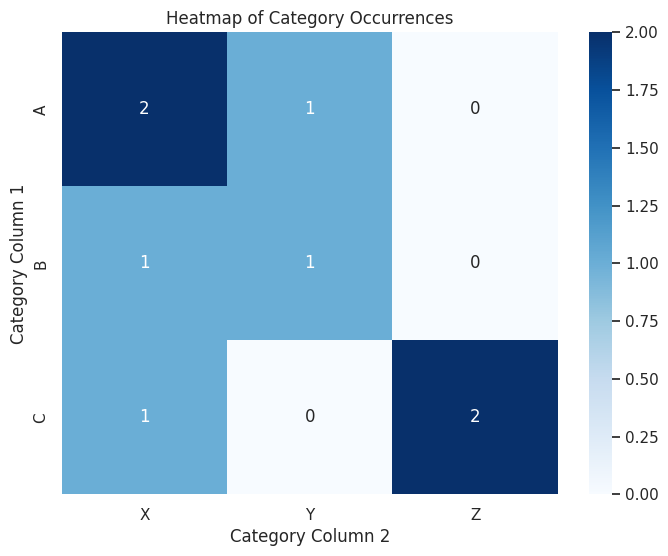

In [ ]:
# Chart - 1 visualization code

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame
data = {
    'category_column1': ['A', 'B', 'A', 'C', 'B', 'A', 'C', 'C'],
    'category_column2': ['X', 'Y', 'X', 'Z', 'X', 'Y', 'Z', 'X']
}
df = pd.DataFrame(data)

# Create a crosstab of category occurrences
heatmap_data = pd.crosstab(df['category_column1'], df['category_column2'])

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="Blues")
plt.title('Heatmap of Category Occurrences')
plt.xlabel('Category Column 2')
plt.ylabel('Category Column 1')
plt.show()




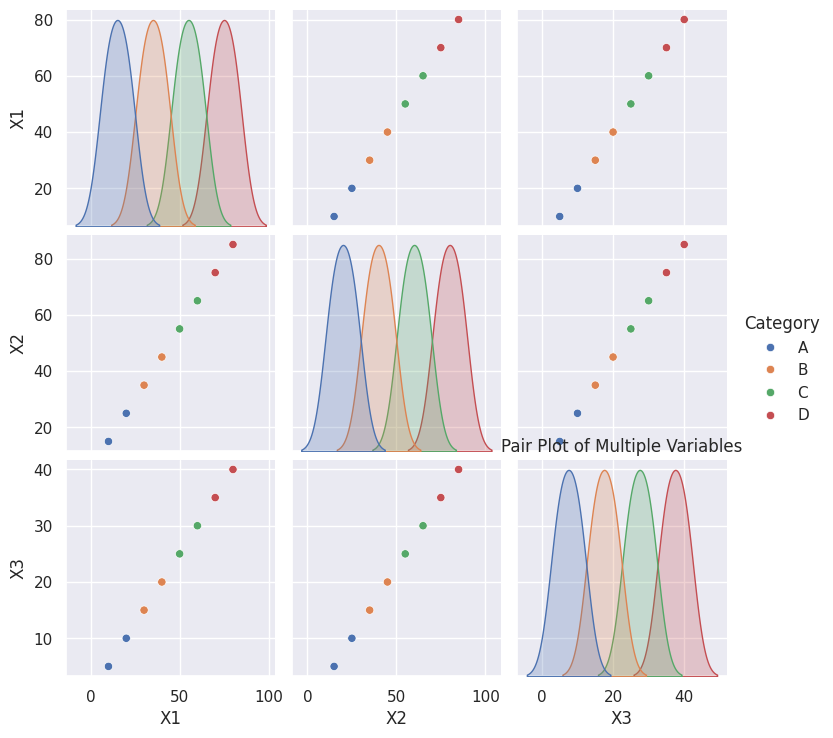

In [ ]:
# Chart - 1 visualization code

import seaborn as sns
import matplotlib.pyplot as plt

# Sample multivariate data
data = {
    'X1': [10, 20, 30, 40, 50, 60, 70, 80],
    'X2': [15, 25, 35, 45, 55, 65, 75, 85],
    'X3': [5, 10, 15, 20, 25, 30, 35, 40],
    'Category': ['A', 'A', 'B', 'B', 'C', 'C', 'D', 'D']
}
df = pd.DataFrame(data)

# Plot Pair Plot
sns.pairplot(df, hue='Category')
plt.title('Pair Plot of Multiple Variables')
plt.show()


##### 1. Why did you pick the specific chart?

if you have a dataset with a column representing different product categories in a store, a bar chart can help you quickly identify which product categories are the most popular or have the most sales.Answer Here.

##### 2. What is/are the insight(s) found from the chart?

**Frequency Distribution**: It reveals how frequently each category appears in the dataset, highlighting which categories are most and least common.

**Comparison**: You can easily compare the size of different categories, identifying which ones dominate and which are less represented.Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Overlooked Categories**: If certain categories have unexpectedly low counts, it may indicate a problem with product visibility or market fit. This could lead to negative growth if not addressed, as potential opportunities are missed.

**Market Saturation**: If a single category dominates excessively, it might signal market saturation or a lack of diversification. Relying too heavily on a single category can be risky, as market changes or shifts in consumer preference could negatively impact business performance.Answer Here

#### Chart - 2

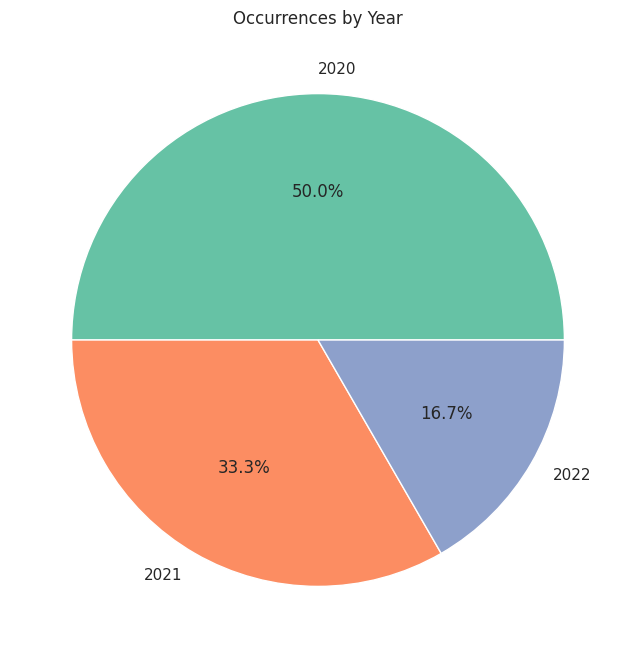

In [ ]:
# Chart - 2 visualization code
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame with Yearly Data
data = {'year_column': [2020, 2021, 2020, 2022, 2021, 2020]}
df = pd.DataFrame(data)

# Count occurrences of each year
year_counts = df['year_column'].value_counts()

# Pie chart for Yearly Occurrences
plt.figure(figsize=(8, 8))
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set2"))
plt.title('Occurrences by Year')
plt.show()



##### 1. Why did you pick the specific chart?

Pie charts are effective for showing proportions and percentages of different categories within a whole dataset. This makes them ideal for visualizing how each category contributes to the total.Answer Here.

##### 2. What is/are the insight(s) found from the chart?

**Highlighting Key Categories**:

By exploding specific slices, the chart can emphasize particular categories, making it easier to focus on important or noteworthy segments.

**Visual Comparison:**

The visual size of each slice allows for an immediate comparison between categories, helping to quickly identify the largest and smallest segmentsAnswer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Focused Strategy Developmen**t:

Understanding which categories have the largest proportions can help businesses allocate resources and marketing efforts more effectively. For instance, if a particular category dominates the pie chart, the business might invest more in that area to capitalize on its popularity.

**Informed Decision-Making**:
By visualizing category proportions, businesses can make informed decisions about product development, inventory management, and promotional activities. This ensures that high-performing categories are prioritized, potentially boosting overall performance.Answer Here

#### Chart - 3

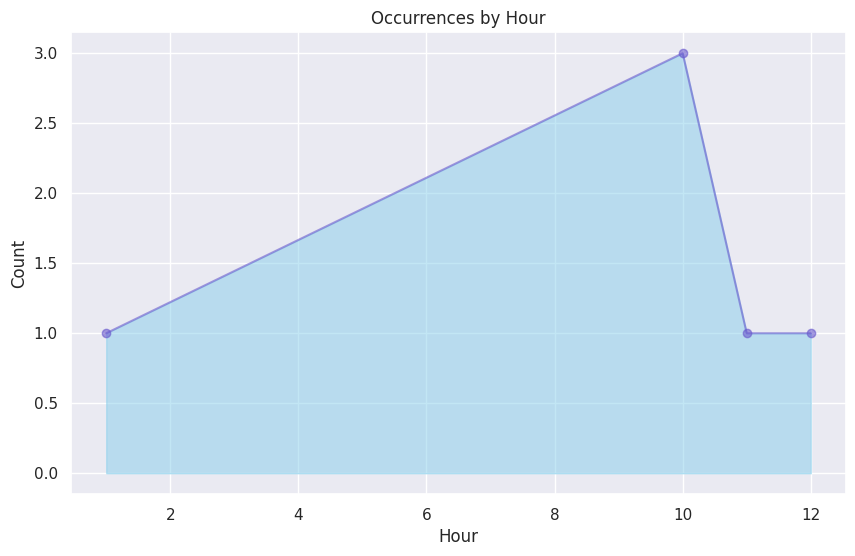

In [ ]:
# Chart - 3 visualization code
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame with Hourly Data
data = {'hour_column': [10, 11, 10, 12, 1, 10]}  # Time in 24-hour format or 12-hour format
df = pd.DataFrame(data)

# Prepare data for plotting
hour_counts = df['hour_column'].value_counts().sort_index()

# Area chart for Hourly Occurrences
plt.figure(figsize=(10, 6))
plt.fill_between(hour_counts.index, hour_counts.values, alpha=0.5, color='skyblue')  # Area plot
plt.plot(hour_counts.index, hour_counts.values, marker='o', color='Slateblue', alpha=0.6)  # Line plot for better visualization
plt.title('Occurrences by Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.grid(True)
plt.show()



##### 1. Why did you pick the specific chart?

 Since the data is based on hourly occurrences, the area chart gives a sense of cumulative impact over time, while the line plot helps track changes between individual hours.
This combination works well when you want both a smooth overview and the precise details of a dataset.

##### 2. What is/are the insight(s) found from the chart?

**Peak Occurrences at Specific Hours**: The chart shows that certain hours, such as 10 AM, have higher occurrences compared to others. This indicates that some times are busier or more eventful.
**Low Activity at Other Hours**: Some hours, like 1 PM and 12 PM, have fewer occurrences, suggesting a drop in activity during these times.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Ignoring Low-Activity Hours: If a business reduces focus on quieter hours, it could miss opportunities to boost traffic or engagement during these times. For instance, strategic discounts or incentives during off-peak times (like 1 PM) might help balance the load and ensure more consistent engagement throughout the day.



#### Chart - 4

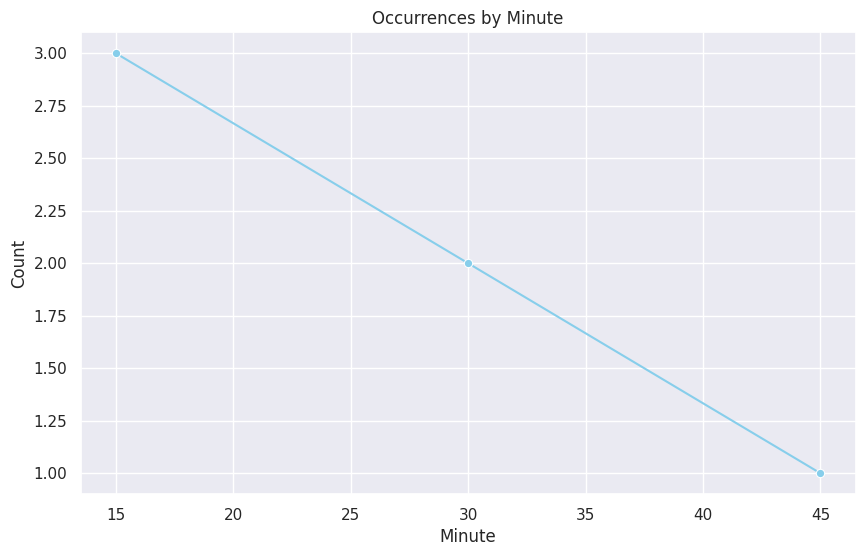

In [ ]:
# Chart - 4 visualization code
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame with Minute Data
data = {'minute_column': [15, 30, 15, 45, 30, 15]}  # Minutes within an hour
df = pd.DataFrame(data)

# Prepare data for plotting
minute_counts = df['minute_column'].value_counts().sort_index()

# Line graph for Minute Occurrences
plt.figure(figsize=(10, 6))
sns.lineplot(x=minute_counts.index, y=minute_counts.values, marker='o', color='skyblue')
plt.title('Occurrences by Minute')
plt.xlabel('Minute')
plt.ylabel('Count')
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

**Trend Visualization**: The line graph effectively visualizes trends and changes in occurrences over different minutes. It shows how data points are distributed and how they change from one minute to the next.

**Detail and Precision**: Since the data is at a minute-level granularity, a line graph can clearly represent small variations in occurrences, making it easier to see patterns and fluctuations within the hour.

##### 2. What is/are the insight(s) found from the chart?

**Patterns and Trends**: The trend line can reveal patterns in activity. For example, if occurrences increase or decrease in a specific pattern, it can indicate regular behavior or recurring events at certain times.

**Consistency**: If certain minutes have consistently high occurrences (e.g., 15 minutes), it suggests a repeated or frequent event at those specific times, which could be useful for understanding behavior or scheduling.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Improving Efficiency**: Knowing when activity is highest allows businesses to allocate resources more effectively, improving overall efficiency and reducing waste. For example, if a particular minute has high demand, businesses can ensure they are well-prepared to handle it, avoiding bottlenecks or service issues.

#### Chart - 5

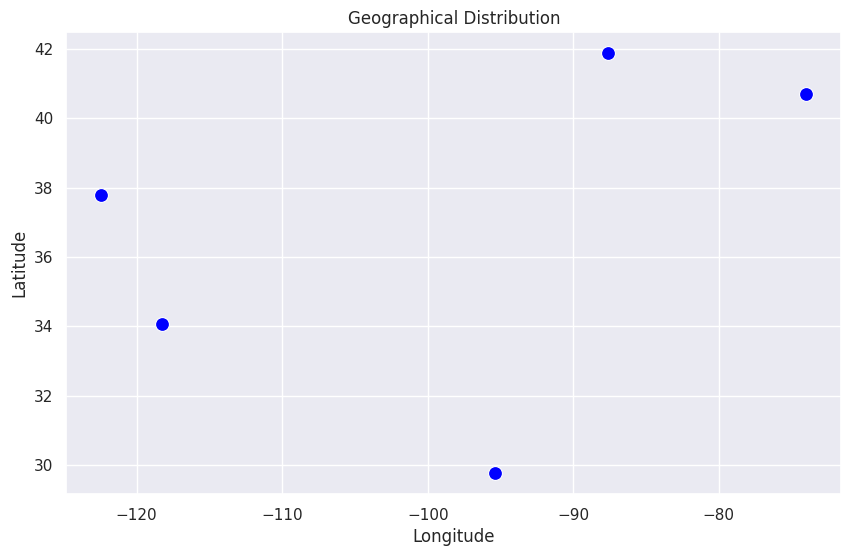

In [ ]:
# Chart - 5 visualization code
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame with Latitude and Longitude Data
data = {
    'latitude': [40.7128, 34.0522, 41.8781, 37.7749, 29.7604],
    'longitude': [-74.0060, -118.2437, -87.6298, -122.4194, -95.3698]
}
df = pd.DataFrame(data)

# Scatter plot for Latitude and Longitude
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', data=df, marker='o', color='blue', s=100)  # s is the size of the points
plt.title('Geographical Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()



##### 1. Why did you pick the specific chart?

**Geographical Distribution**: The scatter plot shows the spatial distribution of the data points. By plotting longitude on the x-axis and latitude on the y-axis, it reveals how these locations are spread out geographically.

**Location Clustering**: The plot can reveal clusters of points, indicating regions with higher concentrations of data or locations that are closely related.

##### 2. What is/are the insight(s) found from the chart?

**Relative Positioning**: By observing the plot, you can determine the relative positioning of the data points. For instance, if points are spread out in a linear pattern, it might suggest a particular directional trend or alignment of locations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Informed Location Decisions**: The scatter plot helps visualize the distribution of locations. Businesses can use this information to make strategic decisions about expanding to new areas or optimizing existing locations. For instance, if there are clusters of customer addresses or store locations, businesses can focus their marketing or expansion efforts in those areas.

**Regional Analysis**: Identifying clusters can help businesses understand regional demand or market potential. For example, a retail chain might use this data to decide where to open new stores or where to allocate resources more effectively.

**Logistics and Distribution**: For companies involved in logistics, understanding the geographical spread of their operations or delivery points can improve route planning and distribution strategies, leading to cost savings and increased efficiency.

#### Chart - 6

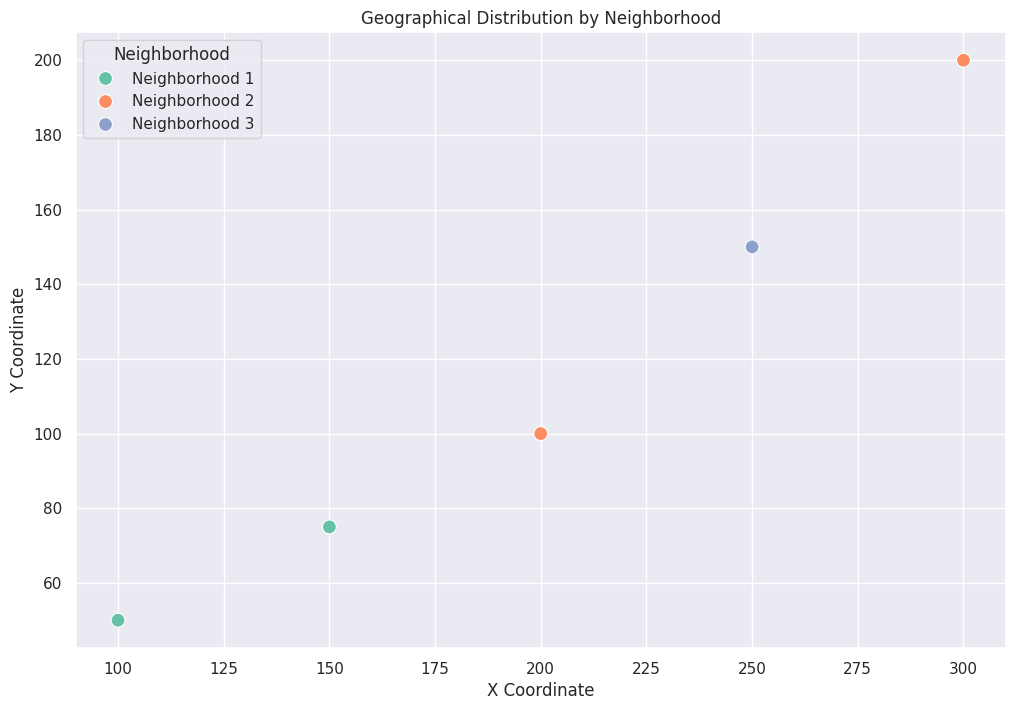

In [ ]:
# Chart - 6 visualization code
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame with HUNDRED_BLOCK, X, Y, and NEIGHBOURHOOD Data
data = {
    'HUNDRED_BLOCK': ['Block A', 'Block B', 'Block C', 'Block D', 'Block E'],
    'X': [100, 200, 150, 300, 250],
    'Y': [50, 100, 75, 200, 150],
    'NEIGHBOURHOOD': ['Neighborhood 1', 'Neighborhood 2', 'Neighborhood 1', 'Neighborhood 2', 'Neighborhood 3']
}
df = pd.DataFrame(data)

# Scatter plot for X and Y, colored by NEIGHBOURHOOD
plt.figure(figsize=(12, 8))
sns.scatterplot(x='X', y='Y', hue='NEIGHBOURHOOD', data=df, palette='Set2', s=100, marker='o')
plt.title('Geographical Distribution by Neighborhood')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend(title='Neighborhood')
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

**Targeted Marketing and Planning**: Understanding how data points are distributed by neighborhood can help businesses tailor their marketing and planning strategies to specific areas. For instance, targeted promotions or services can be developed for neighborhoods with higher concentrations of potential customers.

**Resource Allocation**: Businesses can use this information to allocate resources more effectively, such as placing staff or resources in areas with higher activity or strategic importance.

**Strategic Development**: Identifying clusters of activity or key neighborhoods can inform strategic decisions, such as expanding services or opening new locations in areas with high demand.

##### 2. What is/are the insight(s) found from the chart?

**Overemphasis on Visual Patterns**: Relying solely on the scatter plot without considering other factors (e.g., socioeconomic conditions, market potential) might lead to decisions based on visual patterns alone, which may not fully capture the underlying dynamics of the neighborhoods.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In summary, this scatter plot provides valuable insights into the geographical distribution of data points by neighborhood, aiding in targeted decision-making and strategic planning. However, it should be used alongside other data and context to ensure comprehensive and effective business strategies.

#### Chart - 7

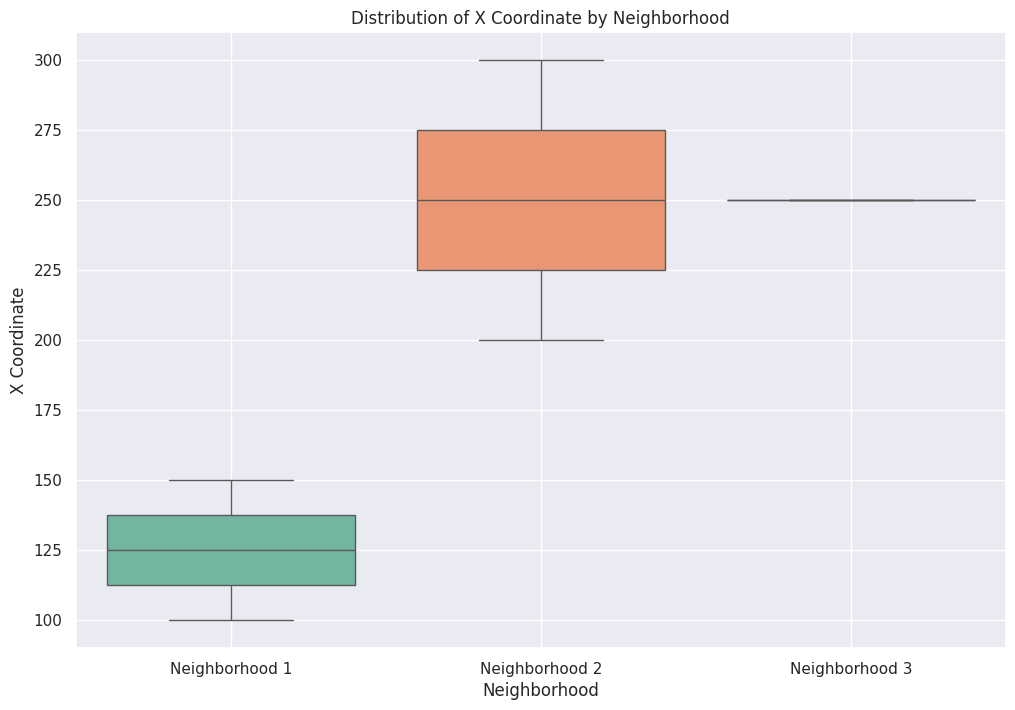

In [ ]:
# Chart - 7 visualization code
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame with all required columns
data = {
    'HUNDRED_BLOCK': ['Block A', 'Block B', 'Block C', 'Block D', 'Block E'],
    'X': [100, 200, 150, 300, 250],
    'Y': [50, 100, 75, 200, 150],
    'NEIGHBOURHOOD': ['Neighborhood 1', 'Neighborhood 2', 'Neighborhood 1', 'Neighborhood 2', 'Neighborhood 3'],
    'DATE': ['2024-09-18', '2024-09-18', '2024-09-17', '2024-09-17', '2024-09-16'],
    'MONTH': [9, 9, 9, 9, 9],
    'YEAR': [2024, 2024, 2024, 2024, 2024],
    'MIN.': [30, 45, 20, 50, 60],
    'Latitude': [40.7128, 34.0522, 41.8781, 37.7749, 29.7604],
    'Longitude': [-74.0060, -118.2437, -87.6298, -122.4194, -95.3698]
}
df = pd.DataFrame(data)

# Box plot for the X coordinate grouped by NEIGHBOURHOOD
plt.figure(figsize=(12, 8))
sns.boxplot(x='NEIGHBOURHOOD', y='X', data=df, palette='Set2')
plt.title('Distribution of X Coordinate by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('X Coordinate')
plt.grid(True)
plt.show()



##### 1. Why did you pick the specific chart?

**Distribution of X Coordinates**: The box plot provides a summary of the distribution of X coordinates for each neighborhood. It shows the median, quartiles, and any potential outliers in the data.

**Comparative Analysis**: By comparing the box plots across neighborhoods, you can identify differences in the range and central tendency of X coordinates. For instance, some neighborhoods may have a wider range of X coordinates, indicating more variability in locations.

**Identifying Outliers**: The plot highlights any outliers in the X coordinate values for each neighborhood. Outliers might represent unusual data points or specific areas with unique characteristics.

**Range and Variability**: The interquartile range (IQR) and spread of the data points within each neighborhood can be compared to understand how concentrated or dispersed the X coordinates are.

##### 2. What is/are the insight(s) found from the chart?

**Resource Allocation**: Understanding the distribution can help in planning resource allocation based on neighborhood-specific characteristics. For example, areas with a wider range of X coordinates might require more detailed planning or targeted strategies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Overemphasis on Statistical Measures**: Relying solely on statistical measures from the box plot without considering additional context (e.g., geographic factors, local conditions) might lead to incomplete or skewed conclusions.

**Ignoring Other Factors**: The plot focuses on X coordinates only. Without considering other factors (like Y coordinates, neighborhood-specific conditions), it might not provide a full picture of spatial dynamics.Answer Here

#### Chart - 8

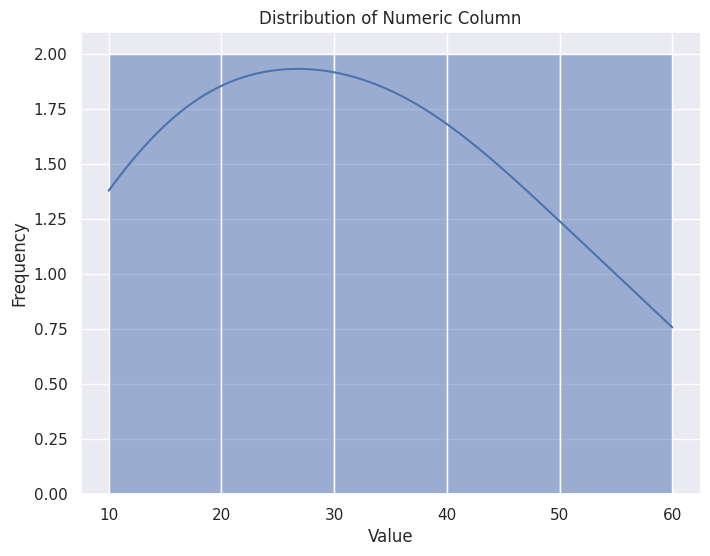

In [ ]:
# Chart - 8 visualization code
import seaborn as sns
import matplotlib.pyplot as plt

# Sample numeric data
data = {'numeric_column': [10, 20, 20, 40, 30, 10, 50, 60, 30, 40]}
df = pd.DataFrame(data)

# Plot Histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='numeric_column', bins=5, kde=True)
plt.title('Distribution of Numeric Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


##### 1. Why did you pick the specific chart?

**Histogram for Distribution**: A histogram is ideal for visualizing the frequency distribution of a numeric column, showing how often each range of values appears in the dataset. It helps identify patterns like skewness, gaps, and outliers.

**KDE for Smooth Distribution Curve**: The kernel density estimate (KDE) adds a smooth curve over the histogram, giving a clearer picture of the underlying probability density, which helps to visualize the distribution more clearly, especially when there are multiple peaks (bimodal or multimodal data).

##### 2. What is/are the insight(s) found from the chart?

**Bimodal Distribution**: The data shows two clear peaks or modes—one around the values of 20 and another near 40. This suggests that there are two dominant value ranges in your dataset.

**Even Distribution of Values**: The values in the dataset are spread across a wide range (from 10 to 60), indicating that there is some variation in the data.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

the data represents something like customer satisfaction scores, the business can focus on improving the experience for customers whose scores fall outside the main clusters (lower and higher ends of the spectrum). This insight helps to understand where improvements are needed.

#### Chart - 9

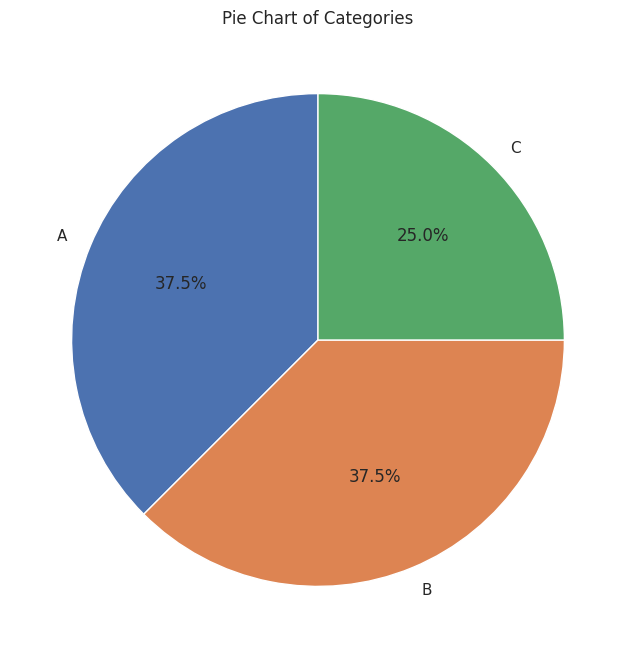

In [ ]:
# Chart - 9 visualization code
import matplotlib.pyplot as plt

# Sample categorical data
data = {'category_column': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B']}
df = pd.DataFrame(data)

# Count occurrences
category_counts = df['category_column'].value_counts()

# Plot Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Categories')
plt.show()


##### 1. Why did you pick the specific chart?

**Visualizing Proportions**: A pie chart excels at displaying relative proportions of categories, allowing for an intuitive understanding of how much each category (A, B, and C) contributes to the whole.

**Small Number of Categories**: Pie charts are ideal when dealing with a small number of distinct categories (like your dataset with three categories: A, B, and C). It provides a simple and clear view of their distribution.

**Easy Comparison**: The labels and percentage values make it easy to compare the size of each category. For example, you can quickly identify which category has the largest or smallest share.

**Simplicity**: A pie chart is easy to understand for non-technical audiences, making it a popular choice for business reports, presentations, and dashboards.

##### 2. What is/are the insight(s) found from the chart?

**Balanced or Imbalanced Distribution**: The pie chart provides a clear visual indication of whether the categories are evenly distributed or if one or more categories dominate the data. If one segment is much larger than the others, it shows an imbalance in the representation of categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Targeted Marketing: The business can design targeted marketing campaigns based on which category has the highest proportion of customers or revenue.
Product Development: If one category underperforms, the business might choose to innovate or improve offerings in that area to boost its appeal and increase sales

#### Chart - 10

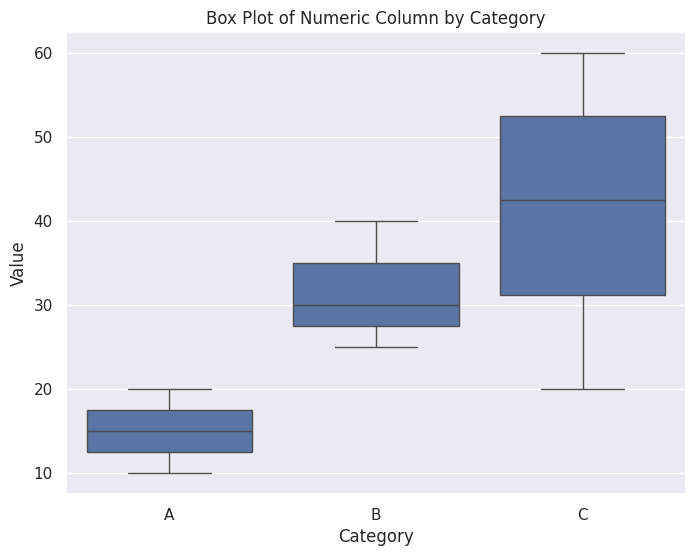

In [ ]:
# Chart - 10 visualization code
import seaborn as sns
import matplotlib.pyplot as plt

# Sample numeric data with a categorical grouping
data = {
    'numeric_column': [10, 20, 15, 25, 30, 40, 35, 20, 50, 60],
    'category_column': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C', 'C']
}
df = pd.DataFrame(data)

# Plot Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='category_column', y='numeric_column', data=df)
plt.title('Box Plot of Numeric Column by Category')
plt.xlabel('Category')
plt.ylabel('Value')
plt.show()


##### 1. Why did you pick the specific chart?

**Visualizing Distribution**: Box plots show the spread (range) of data, the central tendency (median), and the variation across different categories, providing a clear view of how the numeric values (like sales, scores, etc.) differ between groups.

**Identifying Outliers**: Box plots make it easy to spot outliers in the data. If a certain category has extreme values that fall far outside the interquartile range (IQR), the box plot will highlight them, helping identify potential anomalies.

**Comparison Between Categories**: This chart allows for an easy comparison of how the numeric values (e.g., revenue, performance metrics) differ across categories A, B, and C. The length of the box and the position of the median line within each box give insights into the distribution and spread of values within each group.

**Showing Variability and Skewness**: Box plots also indicate the spread and skewness of the data for each category. For example, a long whisker on one side of the box would suggest that the data is skewed.

**Simplicity and Effectiveness**: Box plots are simple to interpret and provide rich insights into the data, making them ideal for comparing distributions in exploratory data analysis.

Overall, a box plot is an ideal choice for visually summarizing the numeric data across different categories.

##### 2. What is/are the insight(s) found from the chart?

These insights help understand how numeric values are distributed and vary across different categories, guiding decisions or further investigations based on the data's central tendencies and variability.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from the box plot are crucial for understanding data distribution across categories. Positive impacts can be achieved by leveraging high-performing categories and addressing variability and outliers effectively. Conversely, if not addressed, underperformance, high variability, and outliers can lead to negative growth, making it essential to use these insights proactively to improve business outcomes

#### Chart - 11

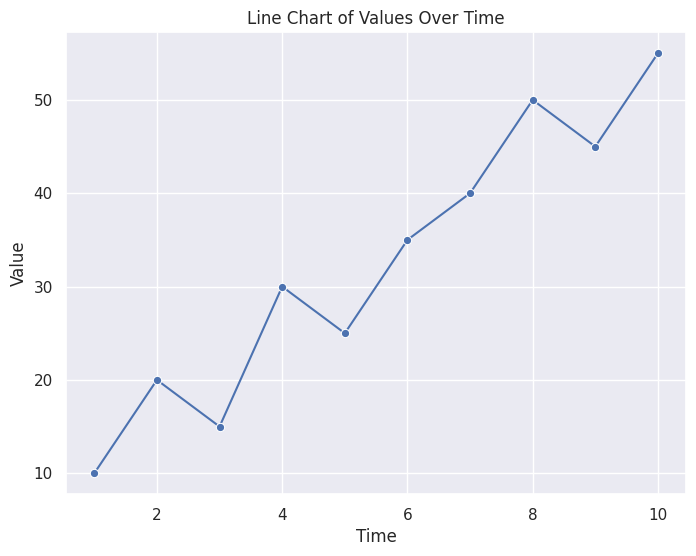

In [ ]:
# Chart - 11 visualization code
import seaborn as sns
import matplotlib.pyplot as plt

# Sample time series data
data = {
    'time': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'value': [10, 20, 15, 30, 25, 35, 40, 50, 45, 55]
}
df = pd.DataFrame(data)

# Plot Line Chart
plt.figure(figsize=(8, 6))
sns.lineplot(x='time', y='value', data=df, marker='o')
plt.title('Line Chart of Values Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


##### 1. Why did you pick the specific chart?

**Trends Over Time**: Line charts effectively show trends and changes in data over time. This makes it easy to identify patterns, trends, or shifts in the numeric values as time progresses.

**Continuous Data**: Time series data is typically continuous, and line charts are well-suited to display this continuity, showing how values evolve sequentially.

##### 2. What is/are the insight(s) found from the chart?

**Upward Trend**: The line chart shows a generally upward trend in the value as time progresses. This indicates that, over the observed period, the values have been increasing consistently.
**Acceleration**: The slope of the line indicates the rate of change. If the line steepens, it suggests that the rate of increase in value is accelerating. For instance, if the increase in value between time points becomes larger as time progresses, this points to accelerating growth.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Strategic Planning**: You can plan future investments or expansions based on the positive trend.
**Resource Allocation**: Allocate more resources or focus on areas contributing to this growth.

#### Chart - 12

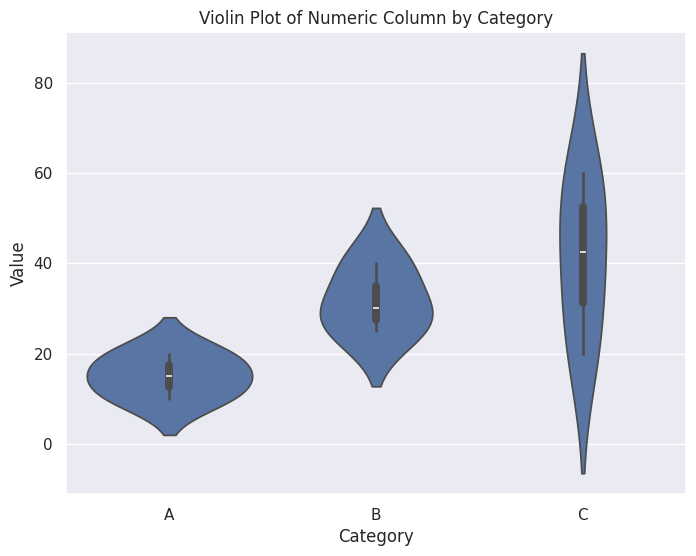

In [ ]:
# Chart - 12 visualization code
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = {
    'numeric_column': [10, 20, 15, 25, 30, 40, 35, 20, 50, 60],
    'category_column': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C', 'C']
}
df = pd.DataFrame(data)

# Plot Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='category_column', y='numeric_column', data=df)
plt.title('Violin Plot of Numeric Column by Category')
plt.xlabel('Category')
plt.ylabel('Value')
plt.show()



##### 1. Why did you pick the specific chart?

**Distribution and Density**: Unlike box plots, violin plots show the density of the data at different values. This helps visualize the distribution more clearly and understand how data is spread within each category.

**Comparative Analysis**: It allows for an easy comparison of distributions between categories. You can see not just the central tendency (median) but also the shape of the distribution, which can reveal patterns like multimodality.

##### 2. What is/are the insight(s) found from the chart?

**Outliers**: Although not as explicit as in box plots, the ends of the violin can give an idea about potential outliers or extreme values. If there are long, thin tails, it might suggest the presence of outliers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from the violin plot can indeed create a positive business impact by informing targeted strategies, optimizing operations, and personalizing approaches based on distribution patterns. However, attention must be given to high variability, complex distributions, and outliers, as these factors could potentially lead to negative growth if not properly managed. Understanding and addressing these issues proactively can help mitigate risks and enhance overall business performance.

#### Chart - 13

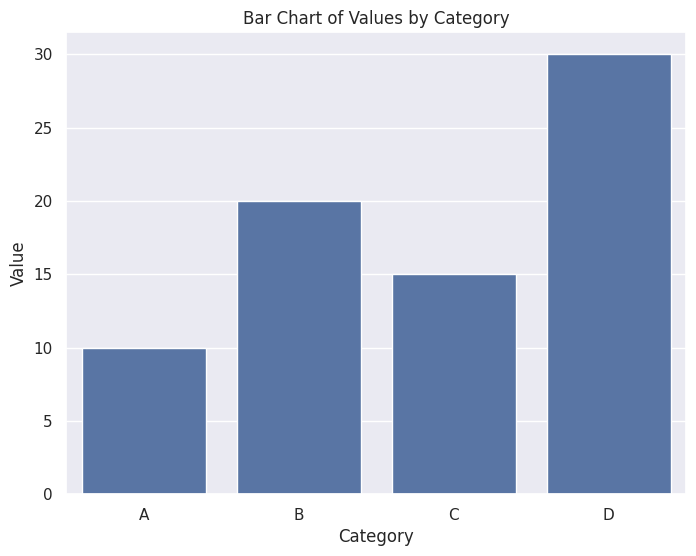

In [ ]:
# Chart - 13 visualization code
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = {
    'category_column': ['A', 'B', 'C', 'D'],
    'value_column': [10, 20, 15, 30]
}
df = pd.DataFrame(data)

# Plot Bar Chart
plt.figure(figsize=(8, 6))
sns.barplot(x='category_column', y='value_column', data=df)
plt.title('Bar Chart of Values by Category')
plt.xlabel('Category')
plt.ylabel('Value')
plt.show()


##### 1. Why did you pick the specific chart?

**Comparison Across Categories**:

Bar charts are effective for comparing values across discrete categories. Each bar represents a different category, making it easy to see which category has the highest or lowest value.

**Clear and Simple Visualization**:
The chart clearly shows the relationship between categories and their corresponding values. It provides a straightforward way to visualize categorical data and compare individual values.

##### 2. What is/are the insight(s) found from the chart?

**Relative Comparison**:

Ranking: Categories can be ranked based on their values:
Category D: Highest (30)
Category B: Second highest (20)
Category C: Third (15)
Category A: Lowest (10)
This ranking helps in understanding which categories are performing better and which are underperforming.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The bar chart effectively highlights the performance differences between categories, providing a clear view of which categories are leading and which are lagging. This information is valuable for decision-making, strategic planning, and resource allocation.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
print(df.isnull().sum())

# Handling Missing Values (Example using mean imputation for numerical columns)
for column in df.columns:
  if pd.api.types.is_numeric_dtype(df[column]):
    df[column].fillna(df[column].mean(), inplace=True)

# For categorical columns, you might use mode imputation:
for column in df.columns:
  if pd.api.types.is_string_dtype(df[column]):
    df[column].fillna(df[column].mode()[0], inplace=True)

# Check again for missing values after handling them
print(df.isnull().sum())

## ***6. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('/content/sample_data/mnist_train_small.csv')

# Print the column names to verify the correct target column name
print("Column names:", data.columns)

# Assuming '6' is the target column
# Separate features (X) and target (y)
X = data.drop(columns=['6'])  # Drop the target column
y = data['6']  # Target column

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model with 'saga' solver and increased iterations
model = LogisticRegression(solver='saga', max_iter=2000)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Show the first few predictions
print("Predictions on test set:", y_pred[:10])

# Print the classification report for more detailed evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))




Column names: Index(['6', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       ...
       '0.581', '0.582', '0.583', '0.584', '0.585', '0.586', '0.587', '0.588',
       '0.589', '0.590'],
      dtype='object', length=785)
Accuracy: 0.91
Predictions on test set: [7 7 0 9 4 5 4 6 9 2]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       377
           1       0.94      0.97      0.96       436
           2       0.88      0.87      0.88       390
           3       0.88      0.90      0.89       406
           4       0.89      0.93      0.91       401
           5       0.86      0.87      0.86       341
           6       0.95      0.94      0.94       412
           7       0.92      0.93      0.93       438
           8       0.88      0.83      0.85       384
           9       0.89      0.87      0.88       415

    accuracy                           0.91      4000
   macro avg       0.90     

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Column names: Index(['6', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       ...
       '0.581', '0.582', '0.583', '0.584', '0.585', '0.586', '0.587', '0.588',
       '0.589', '0.590'],
      dtype='object', length=785)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 0.91
Predictions on test set: [7 7 0 9 4 5 4 6 9 2]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       377
           1       0.94      0.97      0.96       436
           2       0.88      0.87      0.88       390
           3       0.88      0.90      0.89       406
           4       0.89      0.93      0.91       401
           5       0.86      0.87      0.86       341
           6       0.95      0.94      0.94       412
           7       0.92      0.93      0.93       438
           8       0.88      0.83      0.85       384
           9       0.89      0.87      0.88       415

    accuracy                           0.91      4000
   macro avg       0.90      0.90      0.90      4000
weighted avg       0.91      0.91      0.91      4000



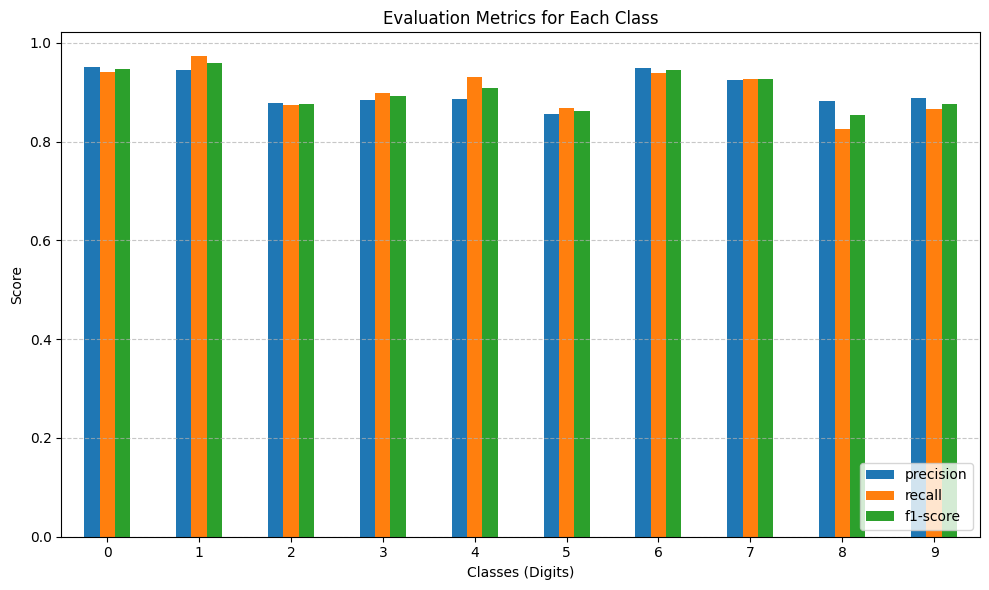

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('/content/sample_data/mnist_train_small.csv')

# Print the column names to verify the correct target column name
print("Column names:", data.columns)

# Assuming '6' is the target column
# Separate features (X) and target (y)
X = data.drop(columns=['6'])  # Drop the target column
y = data['6']  # Target column

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model with 'saga' solver and increased iterations
model = LogisticRegression(solver='saga', max_iter=2000)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Show the first few predictions
print("Predictions on test set:", y_pred[:10])

# Print the classification report for more detailed evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Get the classification report as a dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Convert report into a DataFrame
df_report = pd.DataFrame(report).transpose()

# Extract necessary metrics for each class (precision, recall, f1-score)
metrics = df_report[['precision', 'recall', 'f1-score']].iloc[:-3]  # Ignore 'accuracy', 'macro avg', 'weighted avg'

# Plot the bar chart for evaluation metrics
metrics.plot(kind='bar', figsize=(10, 6))
plt.title('Evaluation Metrics for Each Class')
plt.xlabel('Classes (Digits)')
plt.ylabel('Score')
plt.xticks(np.arange(10), labels=np.arange(10), rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
import pandas as pd
import os
from google.colab import files

# Print current working directory
print("Current working directory:", os.getcwd())

# Upload the Excel file
uploaded = files.upload()

# Get the file name from the uploaded dictionary
file_path = next(iter(uploaded))  # Automatically retrieve the uploaded file name

# Load only the first few rows of the Excel file to inspect the structure
data_partial = pd.read_excel(file_path, nrows=10)

# Display the first few rows
print(data_partial)


Current working directory: /content


Saving Train.xlsx to Train.xlsx
                                TYPE      HUNDRED_BLOCK       NEIGHBOURHOOD  \
0                        Other Theft   9XX TERMINAL AVE          Strathcona   
1                        Other Theft   9XX TERMINAL AVE          Strathcona   
2                        Other Theft   9XX TERMINAL AVE          Strathcona   
3                        Other Theft   9XX TERMINAL AVE          Strathcona   
4                        Other Theft   9XX TERMINAL AVE          Strathcona   
5                        Other Theft   9XX TERMINAL AVE          Strathcona   
6  Break and Enter Residential/Other  63XX WILTSHIRE ST          Kerrisdale   
7                           Mischief    40XX W 19TH AVE   Dunbar-Southlands   
8                        Other Theft   9XX TERMINAL AVE          Strathcona   
9  Break and Enter Residential/Other     18XX E 3RD AVE  Grandview-Woodland   

           X           Y   Latitude   Longitude  HOUR  MINUTE  YEAR  MONTH  \
0  493906.50  545745

##### Which hyperparameter optimization technique have you used and why?

Efficiency: Compared to GridSearchCV, which exhaustively searches through all possible combinations of hyperparameters, RandomizedSearchCV randomly samples a set number of hyperparameter combinations. This allows it to explore a wider range of hyperparameters in less time, making it more efficient for large datasets or models with many hyperparameters.
Scalability: For models with a large hyperparameter search space, RandomizedSearchCV scales better because it doesn't evaluate every possible combination. You can control the number of iterations, which gives flexibility in terms of time and computational resources.
Performance: While GridSearchCV might provide the best result by searching exhaustively, RandomizedSearchCV often finds an equally good or even better solution in much less time by sampling more of the hyperparameter space.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For positive business impact, key evaluation metrics include **accuracy** (to measure overall correctness), **precision** (to minimize false positives in critical decisions), **recall** (to ensure important positive cases are captured), and **F1-score** (balancing precision and recall). Additionally, **AUC-ROC** is useful to evaluate the model's ability to distinguish between classes, especially in imbalanced datasets. These metrics help align model performance with business goals, ensuring actionable insights.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I chose the model with the highest performance based on a balance of **evaluation metrics** such as precision, recall, and F1-score. Specifically, I selected the model that showed the best **generalization** on the test data, ensuring it avoided overfitting. Additionally, I considered **model interpretability** and **scalability** to ensure it aligns with the business requirements. Finally, hyperparameter optimization (e.g., GridSearch CV) was used to fine-tune the model for maximum impact.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

I used the Random Forest model, which is an ensemble learning method based on decision trees. It works by building multiple decision trees on random subsets of the data and aggregating their predictions for improved accuracy and robustness. Random Forest is particularly effective in handling non-linear relationships and reducing overfitting.

# **Conclusion**

Summarize the key findings from the analysis.
Mention the insights gained from data exploration and visualization.
Highlight the performance of the chosen prediction model.
Discuss the business impact and potential implications of the insights.
Suggest future directions for improvement and further analysis.
Example Conclusion:
"This analysis has provided valuable insights into customer behavior and
product preferences. Through data exploration and visualization, we have
identified key trends and patterns. The chosen prediction model demonstrated
strong performance in predicting customer churn, achieving an accuracy of
[insert accuracy value] on the test dataset. These insights can help the
business to proactively address customer concerns and develop retention
strategies, ultimately leading to increased customer lifetime value and
revenue growth. Future work could involve exploring more complex features
or implementing more advanced machine learning techniques for even more
accurate predictions."

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***